# 02_sag_summary

In [20]:
# Load packages
import pandas as pd
import os
import os.path as op
import sys
import csv
import numpy as np
import matplotlib
import glob
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# global options
pd.set_option('display.max_columns', None)

# file paths
path = '/Users/melissaherring/Google Drive/My Drive/MH_project/'
#path = '/Users/juliabrown/Google Drive/My Drive/projects/OMZvir_round2/MH_project/'

# load proximeta master table
sags = pd.read_csv(op.join(path, 'tables/sag_master.csv'))

## Virus type breakdown:

In [21]:
sags.groupby('virus_type').size().reset_index(name='count')

,virus_type,count
0,unassociated vsag,5
1,uninfected sag,311
2,vsag,39


In this data set, there are 39 vmags associated with hosts, 5 vmags that aren't associated with hosts, and 311 sags that aren't associated with viruses.

In [24]:
# create a list of sample depths
sample_depth = [80,95,140,400]

# create a data frame of the number of smags per depth for vmags associated with a host
vsag_host = sags.groupby('virus_type',as_index=False).get_group('vsag')
vsag_host_count = pd.DataFrame(vsag_host['depth'].value_counts())
vsag_host_count.rename(columns={'depth': 'count'}, inplace=True)
vsag_host_count['sample_depth'] = sample_depth
vsag_host_count['type'] = 'vsags associated with a host'

# create a data frame of the total number of vmags (connected to a host and not connected to a host) for each sample depth
vsag_tot = pd.concat([sags.groupby('virus_type',as_index=False).get_group('vsag'), sags.groupby('virus_type',as_index=False).get_group('unassociated vsag')]) 
vsag_tot_count = pd.DataFrame(vsag_tot['depth'].value_counts())
vsag_tot_count.rename(columns={'depth': 'count'}, inplace=True)
vsag_tot_count['sample_depth'] = sample_depth
vsag_tot_count['type'] = 'vsags total'

# merge the two vmag data frames from above to plot
vsag_plot = pd.concat([vsag_host_count,vsag_tot_count])
vsag_plot

,count,sample_depth,type
80,12,80,vsags associated with a host
400,11,95,vsags associated with a host
95,9,140,vsags associated with a host
140,7,400,vsags associated with a host
80,13,80,vsags total
95,13,95,vsags total
400,11,140,vsags total
140,7,400,vsags total


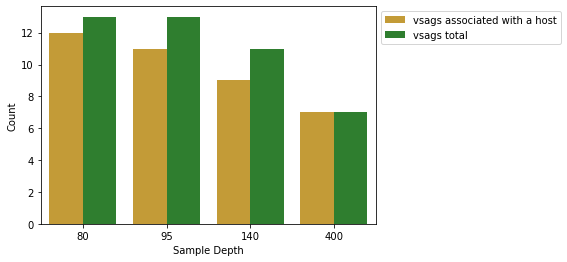

In [25]:
custom_palette2 = ['goldenrod','forestgreen']

sns.barplot(x="sample_depth", y="count", hue="type", data=vsag_plot, palette=custom_palette2)
plt.xlabel('Sample Depth')
plt.ylabel('Count')
plt.legend(title='',loc='upper left', bbox_to_anchor=(1, 1))

This plot shows the number of vsags associated with a host and the total number of vsags (associated with a host and not associated) for each sample depth. The x-axis is sample depth and the y-axis is the number of each type. Yellow bars represent vsags associated with a host and green bars represent the total number of vsags.

Overall, there is a much higher proportion of vsags with associated hosts than vmags with associated hosts. Both the total number of vmags and those associated with hosts generally decrease as depth increases.